# Sensitivity of DIC to pH and *p*CO<sub>2</sub>

*Based on **CO2SYSExample1.m** for MATLAB by Steven van Heuven.*

## Introduction

This is an example of the use of `CO2SYS` that uses its ability to process arrays of data.

We will generate a figure that shows the sensitivity of pH and *p*CO<sub>2</sub> to changes in DIC, while keeping everything else constant.

You can find further information about this way of using PyCO2SYS [in its documentation](https://pyco2sys.readthedocs.io/en/latest/co2sys/).

## Define input conditions

The first step is to define the input conditions that we want to use with `CO2SYS`. In this case, every input has a single constant value except for DIC (`par2`), which is a NumPy array of values increasing from 2100 to 2300 μmol·kg<sup>-1</sup> in increments of 5 μmol·kg<sup>-1</sup>:

In [1]:
# Import NumPy to make the DIC array
import numpy as np

# Define input conditions
par1type =    1  # The first parameter supplied is of type "1", which is "alkalinity"
par1     = 2400  # Value of the first parameter
par2type =    2  # The second parameter supplied is of type "2", which is "DIC"
par2     = np.arange(2100, 2305, 5)  # Value of the second parameter, which is a long vector of different DIC's!
sal      =   35  # Salinity of the sample
tempin   =   10  # Temperature at input conditions
presin   =    0  # Pressure    at input conditions
tempout  =    0  # Temperature at output conditions - doesn't matter in this example
presout  =    0  # Pressure    at output conditions - doesn't matter in this example
sil      =   50  # Concentration of silicate  in the sample (in umol/kg)
po4      =    2  # Concentration of phosphate in the sample (in umol/kg)
pHscale  =    1  # pH scale at which the input pH is reported ("1" means "Total Scale")  
                 #  - doesn't matter in this example
k1k2c    =    4  # Choice of H2CO3 and HCO3- dissociation constants K1 and K2 ("4" means "Mehrbach refit")
kso4c    =    1  # Choice of HSO4- dissociation constants KSO4 ("1" means "Dickson")

print("Input conditions have been set!")

Input conditions have been set!


## Run `CO2SYS`

Once we have defined the input conditions above, solving the marine carbonate system is as simple as importing and running the `CO2SYS` function:

In [2]:
# Import the function
from PyCO2SYS import CO2SYS

# Run CO2SYS!
CO2dict = CO2SYS(par1, par2, par1type, par2type, sal, tempin, tempout, presin, presout,
                 sil, po4, pHscale, k1k2c, kso4c)
print('CO2SYS ran successfully!')

CO2SYS ran successfully!


## Visualise the results

Finally, we can easily visualise the results using a plotting package such as Matplotlib:

<IPython.core.display.Javascript object>


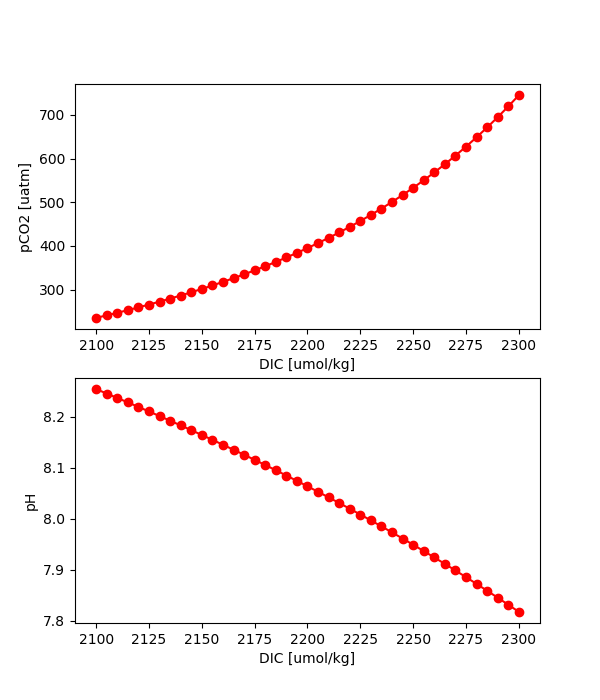

In [3]:
# Import plotting package
from matplotlib import pyplot as plt
%matplotlib notebook

# Prepare an empty figure
fig, ax = plt.subplots(2, 1, figsize=(6, 7))

# The calculated pCO2's are in the field 'pCO2in' of the output DICT of CO2SYS
# Show these in the first subplot
ax[0].plot(par2, CO2dict['pCO2in'], c='r', marker='o')
ax[0].set_xlabel("DIC [umol/kg]")
ax[0].set_ylabel("pCO2 [uatm]")

# The calculated pH's are in the field 'pHin' of the output DICT of CO2SYS
# Show these in the second subplot
ax[1].plot(par2, CO2dict['pHin'], c='r', marker='o')
ax[1].set_xlabel("DIC [umol/kg]")
ax[1].set_ylabel("pH");